<a href="https://colab.research.google.com/github/AntsaHoneywinner/TwistChallengeModule3/blob/main/Education_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How important is education in Africa?
## Insight from the Gdelt 2.0 

[GitHub link is here.](https://github.com/AntsaHoneywinner/TwistChallengeModule3/)

### The challenge:  How much news in Africa is on education each year?


   



To use this notebook, you will need to uncomment the code in all cells and run everything once, make sure to change the name of teh google drive folder you are using.  After you finish querying and predict the topic, you will comment these cells to prevent you running them again because they are very costly.

When everthing is done once, you only need to run section 1 and 3 everytime you want to have a visualization. Enjoy your exploration.

# 1) I need to run the following cells before doing the demos (all datasets already stored in google drive so no need to run models or anything else)

### 1 - Setting up Bigquery and Google Drive in Colab

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
# mounting my google drive to access my files

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/TwistChallengeModule3/'my data'

/content/gdrive/MyDrive/TwistChallengeModule3/my data


In [22]:
import pandas as pd
# from google.cloud import bigquery
import csv
from plotly import graph_objects as go

### Architecture :


[to edit the diagram](https://lucid.app/lucidchart/639ad72b-6f50-4481-87e5-b6b839577e64/edit?invitationId=inv_b95acbb9-c21e-424a-873f-38f7fec6cc47&page=0_0#)



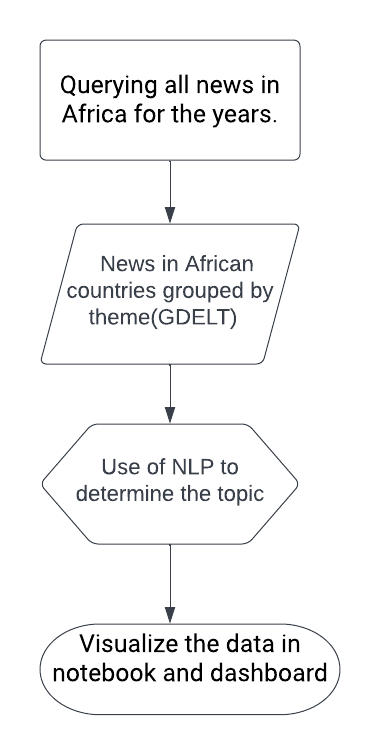

#### Tools for the visualization 

Check
[this ](https://medium.com/geekculture/three-ways-to-plot-choropleth-map-using-python-f53799a3e623) and [this](https://holoviews.org/gallery/demos/bokeh/texas_choropleth_example.html#demos-bokeh-gallery-texas-choropleth-example).


For the [Geojson go here.](https://geojson-maps.ash.ms/)

For accessing the database [go here.](https://www.kaggle.com/code/chasset/load-gdelt-data-with-bigquery)


My own [copy of it](https://www.kaggle.com/code/antsarakotondrafara/load-gdelt-data-with-bigquery/edit).

The list of all themes of GDELT is found [here](http://data.gdeltproject.org/api/v2/guides/LOOKUP-GKGTHEMES.TXT).

Timeline :


4/16/2022 : Load all the data from bigquery to my google drive

4/17/2022 : Come up with the NLP to determine the topic

4/18/2022 : Come up with the visualization.

I followed this [YouTube video](https://www.youtube.com/watch?v=iolQX4XJN2A) and this [pretty notebook](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=SeTJb51SKs_W) to access Bigquery on Colab.

# 2) This is something you run when you first setting up all things,

Installing packages that Colab do not have preinstalled, making the query, doing the NLP prediction, putting the result in a csv file.

In [ ]:
# # installing the Google Bigquery library
# !pip install --upgrade google-cloud-bigquery

In [ ]:
# !pip install google.cloud

In [ ]:
#!pip install sentence_transformers

### Importing required libraries

In [4]:
#variables
project_id = 'twist-challenge-module-3'
#connections
client = bigquery.Client(project=project_id)
# result to dataframe function
def querytodf(query, csvname) :
  '''This function take as input the query, put the result into a csv file and return the dataset'''
  df = pd.io.gbq.read_gbq(query, project_id=project_id, dialect='standard')

  print(df.head())
  dfcsv = df.to_csv(csvname)
  return df 

Now that we see the querying works here, we are going to query all news in African country from 2012 to 2022 and we will group those by country and theme.

I will use this function to make my query.

In [ ]:
 def makequery(country,year  ) :
    '''This function take as input a country and a year and return the query to send to bigquery'''
    return('''SELECT
    '''+ "'" + country +'''' AS country,
    '''+ "'" + year +'''' AS year,
    REGEXP_REPLACE(theme , r',.*', " ") AS theme,
    COUNT(*) AS count,
  FROM
    `gdelt-bq.gdeltv2.gkg`,
    UNNEST(SPLIT(V2Themes,';')) AS theme
  WHERE
    DATE> ''' +year+ '''0101000000
    AND DATE < ''' +year+ '''1231000000
    AND Locations LIKE '%'''+country +'''%' 
  GROUP BY
    theme
  ORDER BY
    4 DESC''')

In [ ]:
#@markdown For you to select the country { run: "auto" }

country = "Botswana" #@param ["Madagascar", "South Africa", "Ghana","Burundi",'Botswana','Nigeria', 'Zambia', 'Mauritius']
print(makequery(country, '2022' ))


SELECT
   'Botswana' AS country,
   '2022' AS year,
   REGEXP_REPLACE(theme , r',.*', " ") AS theme,
   COUNT(*) AS count,
 FROM
   `gdelt-bq.gdeltv2.gkg`,
   UNNEST(SPLIT(V2Themes,';')) AS theme
 WHERE
   DATE> 20220101000000
   AND DATE < 20221231000000
   AND Locations LIKE '%Botswana%' 
 GROUP BY
   theme
 ORDER BY
   4 DESC


In [ ]:
countries = ["Madagascar", "South Africa", "Ghana","Burundi",'Botswana','Nigeria', 'Zambia', 'Mauritius']
years = [ str(2010+i) for i in range(13)]
queryallnews = ''
for i in range(len(countries)) :
  if i == 0 :
      queryallnews =  makequery(countries[i],'2010')   
  for year in years :
     if i== 0 and years == 2010 :
       pass
       
     else : 
       queryallnews   = ' (' +  makequery(countries[i], year)+')' + 'UNION ALL ('+  queryallnews + ')'
     
#print(queryallnews)

The following cell is running only onle, for me to query the dataset and put it into my google drive as csv file. 

In [ ]:
#all_news  = querytodf(query = queryallnews, csvname = 'allnewsafrica.csv')

      country  year                            theme  count
0  Madagascar  2015         TAX_FNCACT_SPOKESPERSON    1587
1  Madagascar  2015                  TAX_FNCACT_CFO     124
2  Madagascar  2015      TAX_WORLDMAMMALS_WILD_BOAR      61
3  Madagascar  2015  WB_721_STATE_OWNED_ENTERPRISES     823
4  Madagascar  2015               EPU_POLICY_BUDGET     222


In [ ]:
ls

africa.geo.json  allnewsafrica.csv


We are not querying anymore this dataset but load it directly from our google drive.

In [5]:
all_news = pd.read_csv('allnewsafrica.csv')

In [6]:
all_news.head()

,Unnamed: 0,country,year,theme,count
0,0,Madagascar,2015,TAX_FNCACT_SPOKESPERSON,1587
1,1,Madagascar,2015,TAX_FNCACT_CFO,124
2,2,Madagascar,2015,TAX_WORLDMAMMALS_WILD_BOAR,61
3,3,Madagascar,2015,WB_721_STATE_OWNED_ENTERPRISES,823
4,4,Madagascar,2015,EPU_POLICY_BUDGET,222


### What is the topic ?

Here, I am regrouping all news in major topic : EDUCATION, RELIGION, TRANSPORT, ENVIRONMENT, SOCIAL, ECONOMIC, POLITIC, INFORMATION_AND_COMMUNICATION, HEALTH, JUSTICE, SCIENCE. For that I saw that there are a lot of possible themes in GDELT so I use a pretrained models to determine under which topic each theme falls into.

In [9]:
from sentence_transformers import SentenceTransformer

from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

class DistanceModel(object):
    """Implementation of simple model for computing the similarity between
       sentences using the cosine similarity between the embedded vectors
    """

    def __init__(self, list_topic = ['EDUCATION', 'RELIGION', 'TRANSPORT', 'ENVIRONMENT', 'SOCIAL', 'ECONOMIC', 'POLITIC', 'INFORMATION_AND_COMMUNICATION', 'HEALTH', 'JUSTICE', 'SCIENCE']
 ):
        """
        Initialise the model for sentence encording using the sentenceTransform library
        and apply the encording to all the sentences in our database
        Args:
            ---
        """

        
        self.topics = list_topic
        self.model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
        self.sentence_embeddings  = self.model.encode(list_topic)
        

    def predict(self, sentence):
        """
        Return the topic predicted by the picking the sentence from out database
        with the highest cosine similarity with the input sentence
        Args:
            sentence (sting)
              -input sentence
        Returns
            task (string)
              -Topic
        """

        one_embedding = self.model.encode(sentence)
        distances = cosine_similarity([one_embedding], self.sentence_embeddings)       
        
        topic = self.topics[np.argmax(distances)]
        
        return topic

In [10]:
nlp = DistanceModel()
def determine_topic(theme):
  '''This function take as input the GDELT theme and return the topic'''
  list_topic = ['EDUCATION', 'RELIGION', 'TRANSPORT', 'ENVIRONMENT', 'SOCIAL', 'ECONOMIC', 'POLITIC', 'INFORMATION_AND_COMMUNICATION', 'HEALTH', 'JUSTICE', 'SCIENCE']
  dict_topic = {'EDUCATION':{'EDUCATION'}, 'RELIGION': {'RELIGION'}, 'TRANSPORT':{'TRANSPORT'}, 'ENVIRONMENT': {'FISH'}, 'SOCIAL':{'SOCIAL'}, 'ECONOMIC':{'ECONOMIC'}, 'POLITIC':{'POLITIC'}, 'INFORMATION_AND_COMMUNICATION':{'JOURNALISM','MEDIA'}, 'HEALTH':{'DISEASE'}, 'JUSTICE': {'COURT'}, 'SCIENCE':{"ROBOT",'ENGINEER'}}
  
  try :
    for topic in list_topic :
      #print(topic)

      if topic in theme : 
        return(topic)

      if (type(dict_topic[topic]) == str)  and (dict_topic[topic]) in theme :
          # print(type(dict_topic[topic])) 
           return(topic)
      
      if type(dict_topic[topic]) ==set :
        for element in dict_topic[topic]:
          #print(element)
          #print(topic)
          if element in theme : 
            return(topic)



    return nlp.predict(theme)
  except :
    return 'OTHER'


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

In [ ]:
all_news['topic'] = all_news['theme'].apply(determine_topic)
#take time

In [ ]:
all_news.head()

### Putting it into a new dataframe and loading it for later use, we will no longuer use the above cells, only panda needed from here.

In [ ]:
# putting into a dataframe so that it will be easier to load

#all_news_with_topic = all_news.to_csv('all_news_with_topic.csv')

In [ ]:
# finaldataset = pd.read_csv('all_news_with_topic.csv')

In [5]:
finaldataset = pd.read_csv('all_news_with_topic_Bplan.csv')

In [6]:
finaldataset.head(10)

,Unnamed: 0,Unnamed: 0.1,country,year,theme,count,topic
0,0,0,Madagascar,2015,TAX_FNCACT_SPOKESPERSON,1587,OTHER
1,1,1,Madagascar,2015,TAX_FNCACT_CFO,124,OTHER
2,2,2,Madagascar,2015,TAX_WORLDMAMMALS_WILD_BOAR,61,OTHER
3,3,3,Madagascar,2015,WB_721_STATE_OWNED_ENTERPRISES,823,OTHER
4,4,4,Madagascar,2015,EPU_POLICY_BUDGET,222,OTHER
5,5,5,Madagascar,2015,TAX_WORLDBIRDS_MERLIN,27,OTHER
6,6,6,Madagascar,2015,TAX_FNCACT_PREACHERS,91,OTHER
7,7,7,Madagascar,2015,WB_1089_STRUCTURAL_TRANSFORMATION,43,OTHER
8,8,8,Madagascar,2015,WB_1452_FAMILY_PLANNING,623,OTHER
9,9,9,Madagascar,2015,TAX_FNCACT_HACKER,33,OTHER


### Grouping the news by the topic and dropping out the time. For each topic taking the percentage of the topic this year.

In [7]:
finaldataset = finaldataset.groupby(['country','year','topic'],as_index=False)['count'].sum()

In [8]:
finaldataset.head(10)

,country,year,topic,count
0,Botswana,2015,ECONOMIC,31587
1,Botswana,2015,EDUCATION,125830
2,Botswana,2015,ENVIRONMENT,36051
3,Botswana,2015,HEALTH,241212
4,Botswana,2015,INFORMATION_AND_COMMUNICATION,75243
5,Botswana,2015,JUSTICE,46610
6,Botswana,2015,OTHER,4050629
7,Botswana,2015,POLITIC,61461
8,Botswana,2015,RELIGION,21674
9,Botswana,2015,SCIENCE,16815


#### Normalization

We want to have the proportion so for this we will use the number of news during the year and take proportion.

In [9]:
def makesum(country, year)  :
  return (finaldataset[(finaldataset['country']==country) & (finaldataset['year']==year) ])['count'].sum()


In [10]:
def makeproportion(myrow) :
  return(myrow['count']/ makesum(myrow['country'], myrow['year']))

In [12]:
proportion =[]
for i in range(finaldataset.shape[0]) :
    proportion.append(makeproportion(finaldataset.iloc[i]))

In [13]:
finaldataset['proportion'] = proportion

In [14]:
finaldataset.head(10)

,country,year,topic,count,proportion
0,Botswana,2015,ECONOMIC,31587,0.006586
1,Botswana,2015,EDUCATION,125830,0.026237
2,Botswana,2015,ENVIRONMENT,36051,0.007517
3,Botswana,2015,HEALTH,241212,0.050296
4,Botswana,2015,INFORMATION_AND_COMMUNICATION,75243,0.015689
5,Botswana,2015,JUSTICE,46610,0.009719
6,Botswana,2015,OTHER,4050629,0.844614
7,Botswana,2015,POLITIC,61461,0.012815
8,Botswana,2015,RELIGION,21674,0.004519
9,Botswana,2015,SCIENCE,16815,0.003506


Just checking if all of these are truly proportion and not something else...

In [16]:
(finaldataset.groupby(['country','year'], as_index=False)['proportion'].sum())

,country,year,proportion
0,Botswana,2015,1.0
1,Botswana,2016,1.0
2,Botswana,2017,1.0
3,Botswana,2018,1.0
4,Botswana,2019,1.0
...,...,...,...
59,Zambia,2018,1.0
60,Zambia,2019,1.0
61,Zambia,2020,1.0
62,Zambia,2021,1.0


### Putting this finalized data, ready to be used in Google Data Studio.

In [18]:
#proportion_topic = finaldataset.to_csv('proportion_topic.csv')

# 3) I only need to run this and 1 during demo because everything is already stored as a csv file in my google drive.

In [20]:
proportion_topic = pd.read_csv('proportion_topic.csv')

In [21]:
proportion_topic.head()

,Unnamed: 0,country,year,topic,count,proportion
0,0,Botswana,2015,ECONOMIC,31587,0.006586
1,1,Botswana,2015,EDUCATION,125830,0.026237
2,2,Botswana,2015,ENVIRONMENT,36051,0.007517
3,3,Botswana,2015,HEALTH,241212,0.050296
4,4,Botswana,2015,INFORMATION_AND_COMMUNICATION,75243,0.015689


### Visualization of the final dataset :      

Here, you can visualize the dataset via Choroplet. Choose your topic of interest and the year, then run the cell. 

#### Single topic

In [ ]:
#@markdown For you to select the theme and year { run: "auto" }

topic = "INFORMATION_AND_COMMUNICATION" #@param ['EDUCATION', 'RELIGION', 'TRANSPORT', 'ENVIRONMENT', 'SOCIAL', 'ECONOMIC', 'POLITIC', 'INFORMATION_AND_COMMUNICATION', 'HEALTH', 'JUSTICE', 'SCIENCE']
year = "2012" #@param [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

#Create figure object 

Dataset = proportion_topic[(proportion_topic['topic']==topic) &(proportion_topic['year']==year) ]


fig = go.Figure(
    go.Choroplethmapbox(
        geojson = 'africa.geo.json', #Assign geojson file
        featureidkey = "properties.COUNTYNAME", #Assign feature key
        locations = Dataset["country"], #Assign location data
        z = Dataset["proportion"], #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True,
    )
)


#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 6, #Zoom in scale
    mapbox_center = {"lat": 23.9, "lon": 121.52}, #Center location of the map
)

#### Side by Side with education